<a href="https://www.kaggle.com/code/ainurrohmanbwx/bi-gru-with-attention-on-sentiment-analysis?scriptVersionId=132468937" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Abstrak

Deep learning algorithms such as LSTM and GRU have successfully generated context information in sequence learning. However, deep learning algorithms cannot focus on the words that contribute the most and, as a result, cannot capture important information in context information. This experiment aims to overcome the inability of deep learning algorithms such as LSTM and GRU to capture important information. An experiment combines Bidirectional GRU (BiGRU) with an attention mechanism using word2vec as word embedding. Attention mechanisms are used to capture important words so that the architecture can understand important information. The results of the experiment are satisfactory, with results of 93.12% accuracy, 93.32% ROC-AUC, and 95.28% precision-recall

# Introduction

Deep learning algorithms such as LSTM and Gated Recurrent Unit (GRU) have successfully generated context information in sequence learning. However, the algorithm cannot focus on the words that contribute the most; as a result, it cannot capture important information in context information.

To overcome this problem, this experiment tries to create an architecture using word2vec for word embedding, Bidirectional GRU (BiGRU) for sequence learning. GRU was chosen because it can overcome vanishing and exploding gradients in RNN and is more straightforward than LSTM, while Bi-GRU is a combination of two hidden layers, namely forward and backward; in this way, it can access the previous and next contexts. Global attention is used to capture important information from context information.

The basic idea is that Global attention is used to provide attendees with different context information generated by Bi-GRU by giving different weights to variable-length in sequence learning. Then the features extracted from global attention are combined and classified using the softmax classifier so that the model can capture important information from the sequence. The proposed model will be tested using sentiment analysis in the hotel review dataset on the TripAdvisor application.


# Literature Review

**Word2Vec**

Word2Vec is a popular natural language processing model for generating semantically rich vector representations of words. This model was developed by Tomas Mikolov in 2013 while he was working at Google. Word2Vec uses a machine learning approach called "distributed representation" to convert words to numbers in a multidimensional space.

The term "distributed representation" refers to the idea that each word is reflected as a vector, where the meaning of the word and its relationship to other words is reflected in the distance and direction of the vector. In Word2Vec, the vector representation of words is obtained through an unsupervised machine learning process using a large text corpus.

Word2Vec has two main architectures: Continuous Bag-of-Words (CBOW) and Skip-gram. In the CBOW architecture, the model learns to predict the target word based on the context of the given word around it. In contrast, the model learns to retain word context based on the given target word in the Skip-gram architecture.

**Bidirectional GRU**

Bidirectional GRU (Gated Recurrent Unit) is an architectural recurrence model used to process data sequences, such as text or time, taking into account the context before and after the point being processed. Bidirectional GRU combines two GRU units that work sequentially, one GRU unit running forward and one GRU unit running backward.

GRU is a type of recurrence unit similar to LSTM (Long Short-Term Memory). The GRU unit overcomes the problem of vanishing gradients and can retain long-term and short-term information in data sequences. GRU units use gates to regulate the information flow and control the interaction level between the unit cells and unit outputs.

In bidirectional GRU, the forward GRU unit processes the data sequence from start to finish, while the backward GRU unit processes the data sequence from end to start. This process allows the model to comprehensively understand the global context around each point in the data sequence.

**Global Attention**

Global Attention is essential in natural language processing and other data sequence modeling. This mechanism allows the model to pay greater attention to important parts of the data sequence when performing tasks such as machine translation or text processing. In language processing, Global Attention is often used in neural models such as Transformers.

The basic concept of Global Attention is to give weight to each element in sorting data based on the importance of that element for the task being performed. These weights are then used to calculate the data sequence's connection join or "context". This context representation allows the model to focus on relevant information and ignore unimportant information.

# Experiment

## GPU test

In [102]:
!nvidia-smi

Tue Jun  6 06:12:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P0    31W /  70W |  14464MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla T4            Off  | 00000000:00:05.0 Off |                    0 |
| N/A   

## Install library

In [103]:
!pip install contractions

## Warning disable

In [104]:
import warnings
warnings.filterwarnings('ignore')

## Load data

In [105]:
import pandas as pd

df = pd.read_csv('/kaggle/input/trip-advisor-hotel-reviews/tripadvisor_hotel_reviews.csv')
df.rename(columns = {'Review':'review', 'Rating':'sentiment'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     20491 non-null  object
 1   sentiment  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [106]:
df.head()

,review,sentiment
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


## Exploratory data analysis

In [107]:
df = df.replace({'sentiment' : {1:'negative', 2:'negative', 3:'neutral', 4:'positive', 5: 'positive' }})
df = df[df.sentiment != "neutral"]
df.head()

,review,sentiment
0,nice hotel expensive parking got good deal sta...,positive
1,ok nothing special charge diamond member hilto...,negative
3,"unique, great stay, wonderful time hotel monac...",positive
4,"great stay great stay, went seahawk game aweso...",positive
5,love monaco staff husband stayed hotel crazy w...,positive


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18307 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     18307 non-null  object
 1   sentiment  18307 non-null  object
dtypes: object(2)
memory usage: 429.1+ KB


### Sentiment distribution

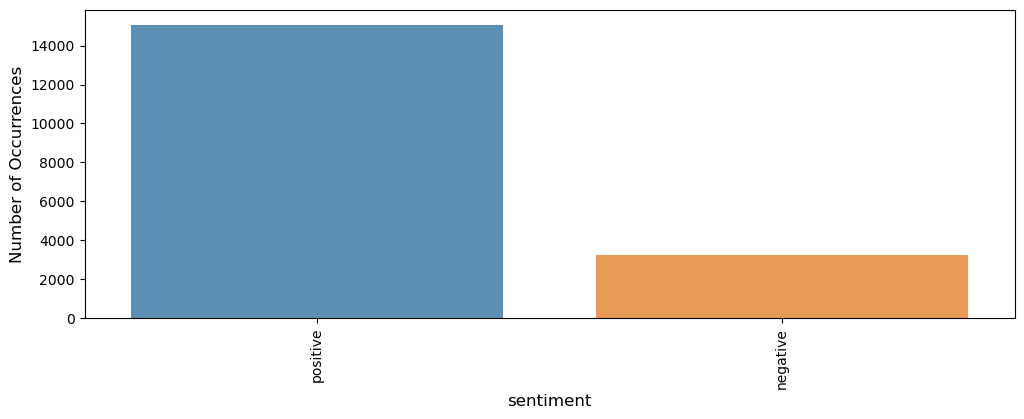

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = df['sentiment'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=sentiment.index, y=sentiment.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('sentiment', fontsize=12)
plt.xticks(rotation=90)
plt.show();

## Data preparation

### Data cleaning

In [110]:
from bs4 import BeautifulSoup

def strip_html_tags(text):
  soup = BeautifulSoup(text, "html.parser")
  [s.extract() for s in soup(['iframe', 'script'])]
  stripped_text = soup.get_text()
  stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
  return stripped_text

def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

def stopwords_removal(words):
    list_stopwords = nltk.corpus.stopwords.words('english')
    return [word for word in words if word not in list_stopwords]

In [111]:
import re
import nltk
import tqdm
import unicodedata
import contractions

from nltk.tokenize import word_tokenize

def pre_process_corpus(docs):
  norm_docs = []
  for doc in tqdm.tqdm(docs):
    #case folding
    doc = doc.lower()
    #remove special characters\whitespaces
    doc = strip_html_tags(doc)
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    doc = remove_accented_chars(doc)
    doc = contractions.fix(doc)
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()
    #tokenize
    doc = word_tokenize(doc)
    #filtering
    doc = stopwords_removal(doc)
    norm_docs.append(doc)
  
  norm_docs = [" ".join(word) for word in norm_docs]
  return norm_docs

In [112]:
%%time
df.review = pre_process_corpus(df.review)

100%|██████████| 18307/18307 [00:31<00:00, 590.22it/s]


CPU times: user 30.5 s, sys: 625 ms, total: 31.1 s
Wall time: 31.2 s


In [113]:
df.head()

,review,sentiment
0,nice hotel expensive parking got good deal sta...,positive
1,ok nothing special charge diamond member hilto...,negative
3,unique great stay wonderful time hotel monaco ...,positive
4,great stay great stay went seahawk game awesom...,positive
5,love monaco staff husband stayed hotel crazy w...,positive


### Handling imbalance (oversampling)

In [114]:
from sklearn.utils import resample
# Separate majority and minority classes in training data for upsampling 
data_majority = df[df['sentiment'] == "positive"]
data_minority = df[df['sentiment'] == "negative"]

print("majority class before upsample:",data_majority.shape)
print("minority class before upsample:",data_minority.shape)

# Upsample minority class
data_minority_upsampled = resample(data_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples= data_majority.shape[0],    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_balance = pd.concat([data_majority, data_minority_upsampled])
 
# Display new class counts
print("After upsampling\n",df_balance.sentiment.value_counts(),sep = "")

majority class before upsample: (15093, 2)
minority class before upsample: (3214, 2)
After upsampling
positive    15093
negative    15093
Name: sentiment, dtype: int64


### Data splitting

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.review, df.sentiment, test_size=0.1, random_state=42)
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((16476,), (1831,), (16476,), (1831,))

### Tokenizer

In [116]:
import keras
import tensorflow as tf

t = tf.keras.preprocessing.text.Tokenizer(oov_token='<UNK>')
# fit the tokenizer on the documents
t.fit_on_texts(X_test)
t.word_index['<PAD>'] = 0

### Sequence

In [117]:
train_sequences = t.texts_to_sequences(X_train)
test_sequences = t.texts_to_sequences(X_test)

In [118]:
VOCAB_SIZE = len(t.word_index)

print("Vocabulary size={}".format(len(t.word_index)))
print("Number of Documents={}".format(t.document_count))

Vocabulary size=18529
Number of Documents=1831


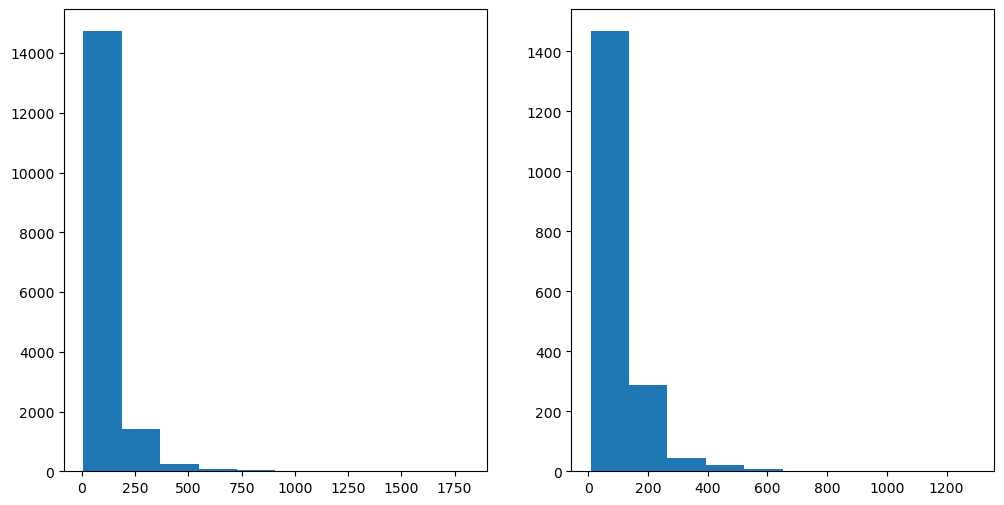

In [119]:
%matplotlib inline

train_lens = [len(s) for s in train_sequences]
test_lens = [len(s) for s in test_sequences]

fig, ax = plt.subplots(1,2, figsize=(12, 6))
h1 = ax[0].hist(train_lens)
h2 = ax[1].hist(test_lens)

### Sequence Normalization

In [120]:
MAX_SEQUENCE_LENGTH = 100

# pad dataset to a maximum review length in words
X_train = keras.utils.data_utils.pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_test = keras.utils.data_utils.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_train.shape, X_test.shape

((16476, 100), (1831, 100))

### Encoding Labels

In [121]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
num_classes=2 # positive -> 1, negative -> 0

In [122]:
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

## Modelling

### Attention Mechanism

Attention Layer focuses on attending to the most important words. We sent all the states from our GRU model into the attention model.

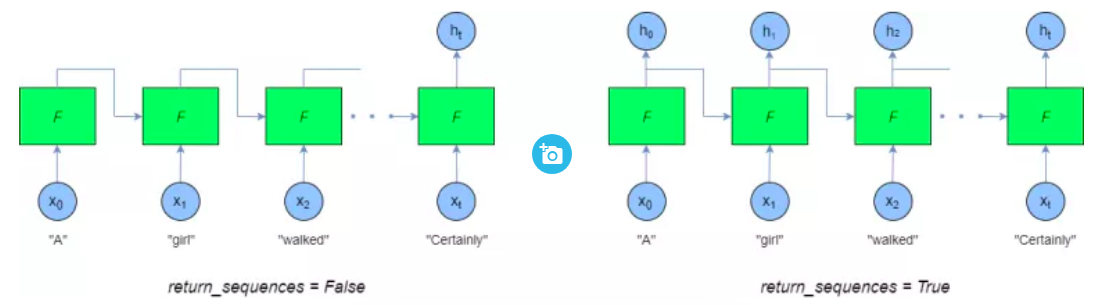

The attention layer produces a context vector

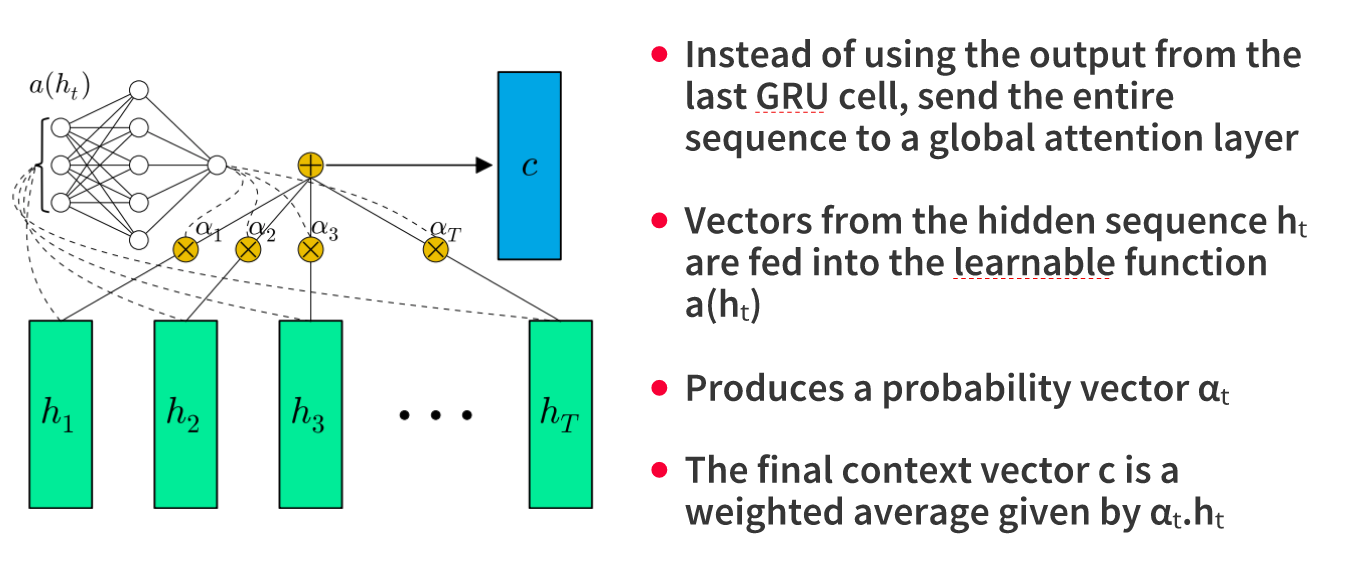

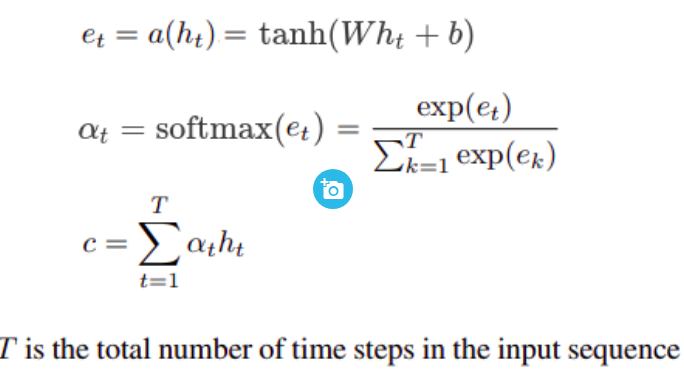


In [123]:
from keras.layers import Layer
from keras import backend as K


class AttentionLayer(Layer):
    
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        
        self.supports_masking = True
        self.init = keras.initializers.get('glorot_uniform')

        self.W_regularizer = keras.regularizers.get(W_regularizer)
        self.b_regularizer = keras.regularizers.get(b_regularizer)

        self.W_constraint = keras.constraints.get(W_constraint)
        self.b_constraint = keras.constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(AttentionLayer, self).__init__(**kwargs)
        

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight(shape=(input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight(shape=(input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True
        

    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None

    
    def call(self, x, mask=None):
        # TF backend doesn't support it
        # eij = K.dot(x, self.W) 
        # features_dim = self.W.shape[0]
        # step_dim = x._keras_shape[1]

        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)), 
                              K.reshape(self.W, (features_dim, 1))),
                        (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        a = K.expand_dims(a)
        weighted_input = x * a
        
        return K.sum(weighted_input, axis=1)

    
    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim
    
    
    def get_config(self):
        config = {'step_dim': self.step_dim}
        base_config = super(AttentionLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

### Model Architecture

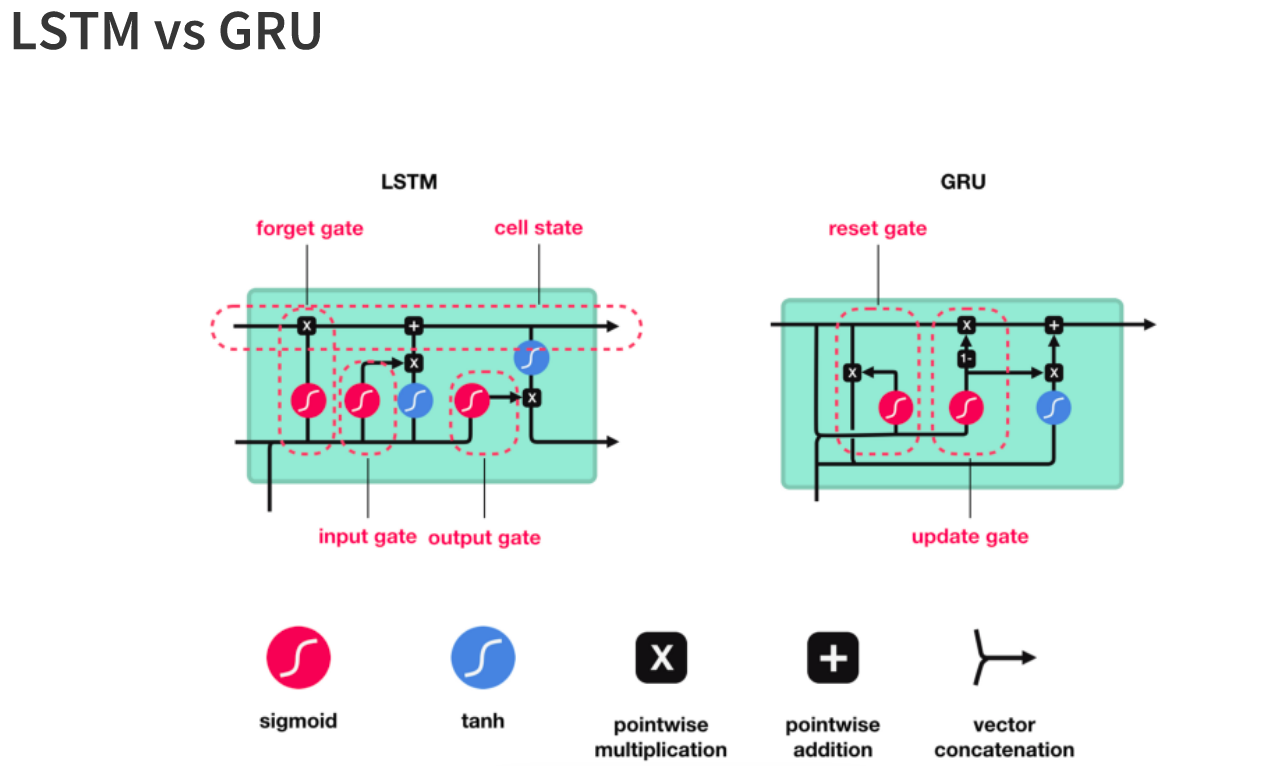

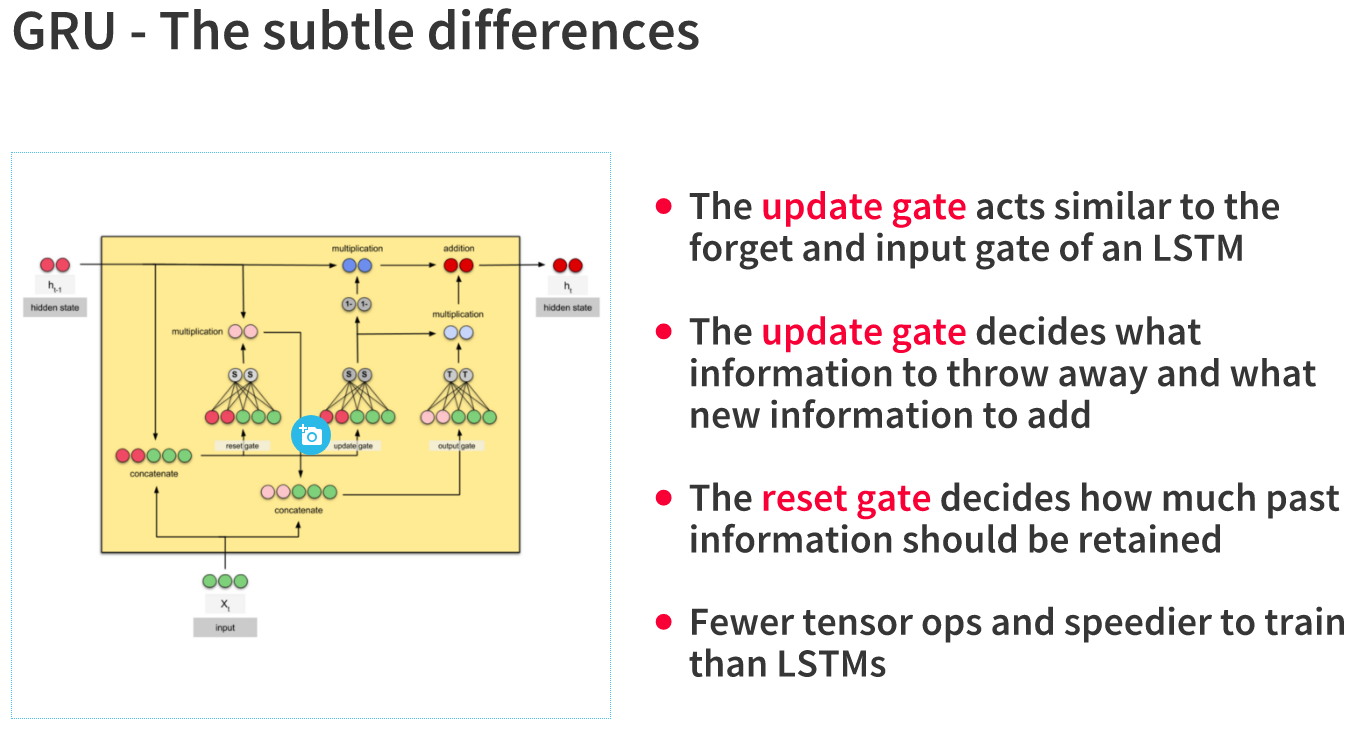

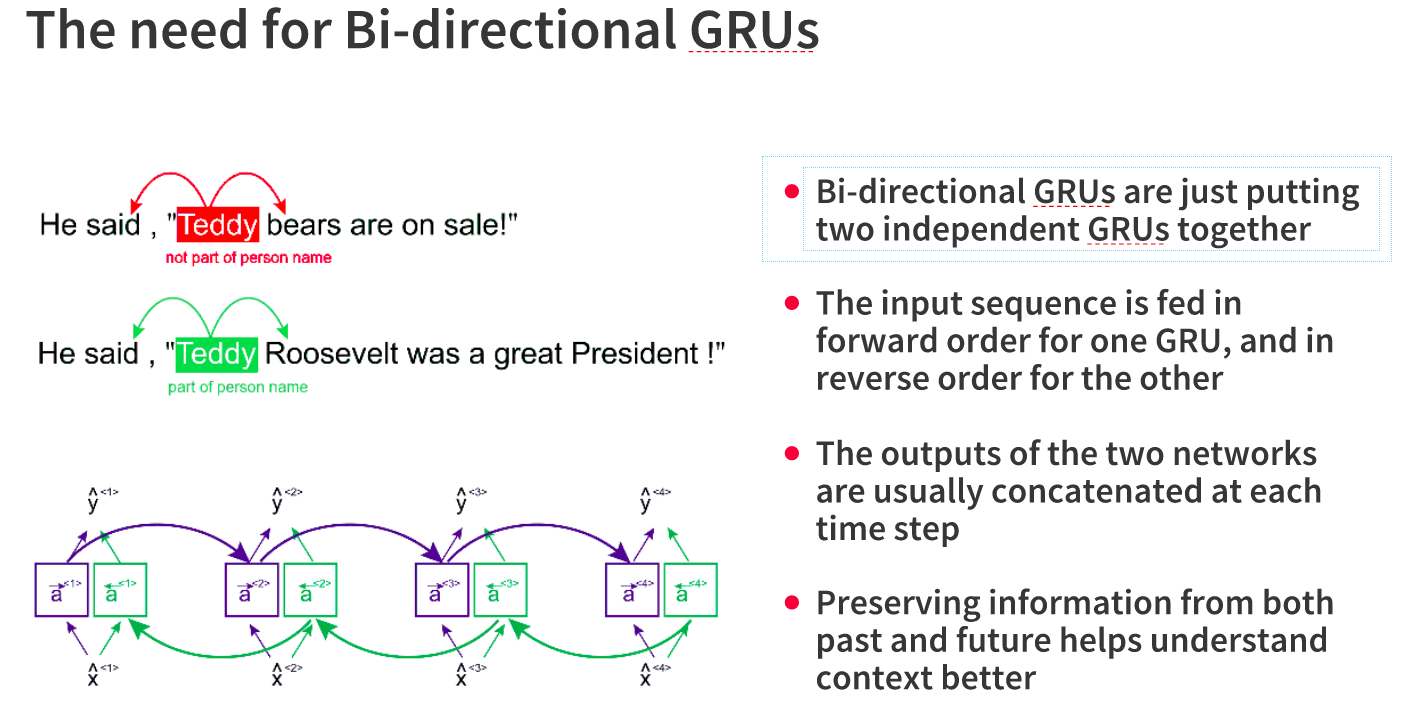

In [124]:
import keras
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model
from keras.layers import Input, Embedding, Bidirectional, CuDNNGRU, Concatenate, Dense, Dropout, LSTM

EMBEDDING_DIM = 300 # dimension for dense embeddings for each token
GRU_DIM = 32 # total GRU units

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,))
embedded_sequences = Embedding(VOCAB_SIZE, EMBEDDING_DIM, trainable=True)(sequence_input)
bigru = Bidirectional(layers.CuDNNGRU(GRU_DIM, return_sequences=True))(embedded_sequences)
#bigru = keras.layers.Bidirectional(keras.layers.GRU(GRU_DIM, return_sequences=True, recurrent_dropout=0.2))(embedded_sequences)
att = AttentionLayer(MAX_SEQUENCE_LENGTH)(bigru)
dense1 = Dense(GRU_DIM*2, activation='relu')(att)
dropout1 = Dropout(rate=0.3)(dense1)
dense2= Dense(GRU_DIM, activation='relu')(dropout1)
dropout2 = Dropout(rate=0.3)(dense2)

outp = keras.layers.Dense(1, activation='sigmoid')(dense2)
# initialize the model
model = keras.models.Model(inputs=sequence_input, outputs=outp)

    
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [125]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 100, 300)          5558700   
                                                                 
 bidirectional_4 (Bidirectio  (None, 100, 64)          64128     
 nal)                                                            
                                                                 
 attention_layer_4 (Attentio  (None, 64)               164       
 nLayer)                                                         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0   

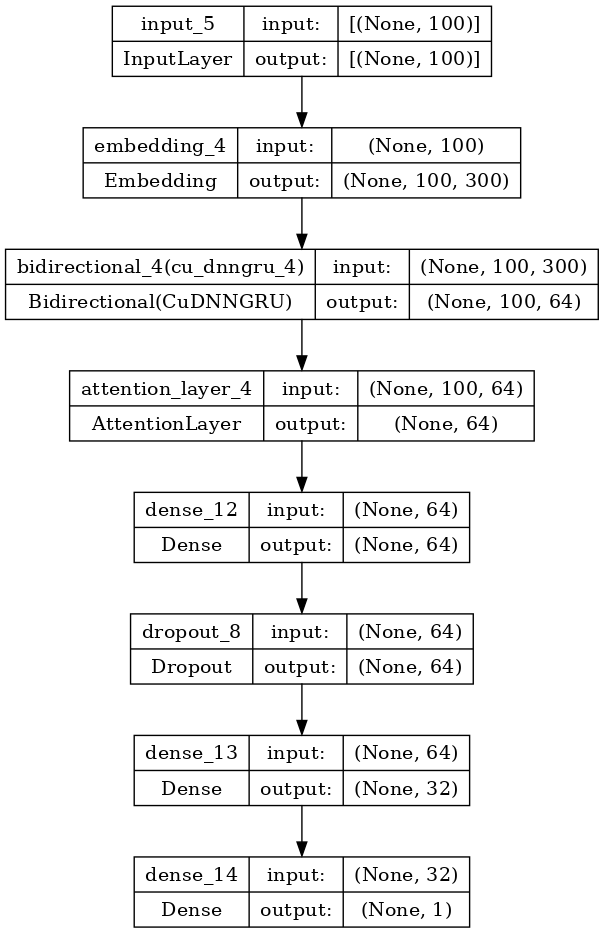

In [126]:
keras.utils.plot_model(model, show_shapes=True, dpi = 100)

### Train model

In [127]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

epochs = 100
batch_size = 128

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('./best_model/best_model_gru.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history = model.fit(X_train, y_train,  batch_size=batch_size, shuffle=True, validation_split=0.1, epochs=epochs, verbose=1, callbacks=[es, mc])

Epoch 1/100
115/116 [============================>.] - ETA: 0s - loss: 0.3373 - accuracy: 0.8675
Epoch 1: val_accuracy improved from -inf to 0.93325, saving model to ./best_model/best_model_gru.h5
116/116 [==============================] - 4s 21ms/step - loss: 0.3357 - accuracy: 0.8683 - val_loss: 0.1660 - val_accuracy: 0.9333
Epoch 2/100
113/116 [============================>.] - ETA: 0s - loss: 0.1138 - accuracy: 0.9579
Epoch 2: val_accuracy improved from 0.93325 to 0.93993, saving model to ./best_model/best_model_gru.h5
116/116 [==============================] - 2s 16ms/step - loss: 0.1149 - accuracy: 0.9574 - val_loss: 0.1653 - val_accuracy: 0.9399
Epoch 3/100
113/116 [============================>.] - ETA: 0s - loss: 0.0527 - accuracy: 0.9815
Epoch 3: val_accuracy did not improve from 0.93993
116/116 [==============================] - 2s 14ms/step - loss: 0.0540 - accuracy: 0.9812 - val_loss: 0.1953 - val_accuracy: 0.9326
Epoch 4/100
113/116 [============================>.] - ETA:

## Evaluation

### Model Accuracy

In [128]:
from keras.models import load_model

# Final evaluation of the model
# load the saved model
saved_model = load_model('./best_model/best_model_gru.h5', custom_objects={'AttentionLayer': AttentionLayer})
train_acc = saved_model.evaluate(X_train, y_train, verbose=1)
test_acc = saved_model.evaluate(X_test, y_test, verbose=1)
print('Train: %.2f%%, Test: %.2f%%' % (train_acc[1]*100, test_acc[1]*100))

58/58 [==============================] - 0s 5ms/step - loss: 0.1792 - accuracy: 0.9317
Train: 97.83%, Test: 93.17%


### Identify Overfitting

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


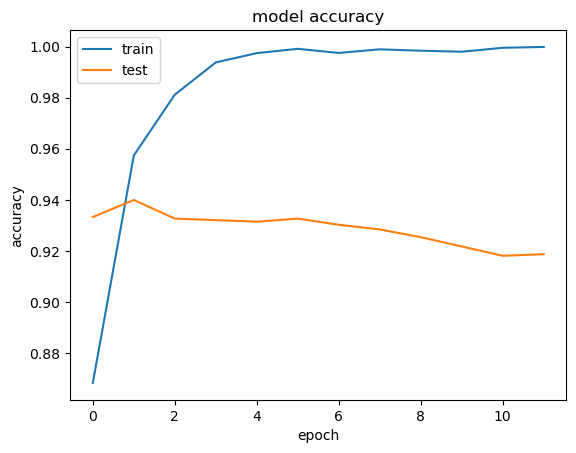

In [129]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model akurasi dropout 0.5 balance.jpg')
plt.show()

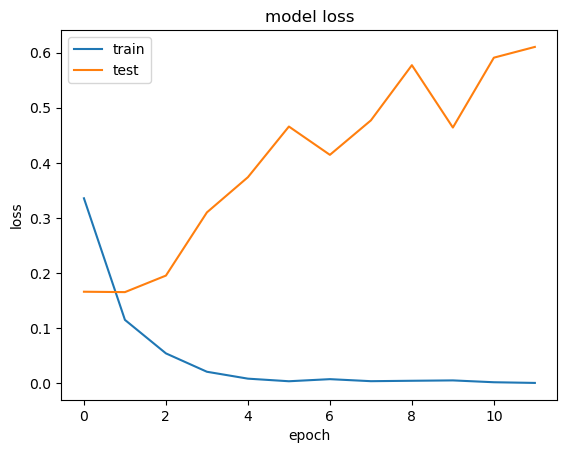

In [130]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model loss dropout 0.5 balance.jpg')
plt.show()

In [131]:
prediction_probs = model.predict(X_test, verbose=1).ravel()
predictions = [1 if prob > 0.5 else 0 for prob in prediction_probs]
#predictions = ['positive' if item == 1 else 'negative' for item in predictions]

58/58 [==============================] - 1s 5ms/step


### Confusion Matrix

In [132]:
from sklearn.metrics import confusion_matrix, classification_report

labels = ['positive', 'negative']
print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions), index=labels, columns=labels)

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       341
           1       0.94      0.96      0.95      1490

    accuracy                           0.92      1831
   macro avg       0.88      0.85      0.87      1831
weighted avg       0.92      0.92      0.92      1831



,positive,negative
positive,253,88
negative,53,1437


### ROC AUC

In [133]:
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], ls="--")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model AUC score: 0.9564594855242182


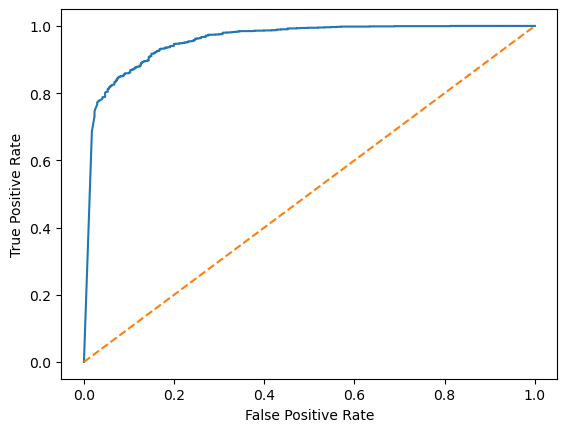

In [134]:
plot_roc_curve(y_test, prediction_probs)
print(f'model AUC score: {roc_auc_score(y_test, prediction_probs)}')

### Precision-Recall

model f1 score: 0.9532338308457711 model AUC score: 0.9890831106169807


Text(0, 0.5, 'Precision')

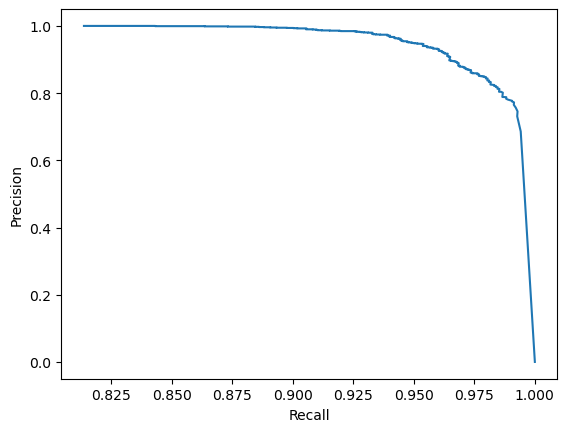

In [135]:
from sklearn.metrics import precision_recall_curve, f1_score, auc

precision, recall, thresholds = precision_recall_curve(y_test, prediction_probs)
print(f'model f1 score: {f1_score(y_test, predictions)} model AUC score: {auc(recall, precision)}')
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')

# Result

This experiment aims to overcome problems in deep learning algorithms such as LSTM and GRU, which cannot capture important information in sequence learning. Experiments to overcome this problem use bidirectional GRU by combining global attention and word2vec as word embedding. Global attention works by focusing on the most contributing words so that they form like keywords. The results of the experiment are satisfactory, with 93.12% accuracy, 93.32% ROC-AUC, and 95.28% precision-recall

# Conclusion

The suggestions for further experiments are:
1. Use other attention mechanisms such as self-attention, multi-head, and hierarchical attention to improve performance.
2. Implement cross-validation testing during training to reduce overfitting and underfitting.
3. Using other word embeddings such as GloVe and FastText.
4. Apply the proposed model to an actual application.
